# Dry Beans Classification

## Abstract:
Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera.
A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.
## Relevant Information:
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Attribute Information:

1. Area : The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
pwd

'C:\\Users\\HP\\Documents\\DS-ML-IOT\\mini project\\Logistic regession'

In [3]:
data= pd.read_excel('Dry_Bean_Dataset.xlsx')

In [4]:
data

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1          0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2          0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3          0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4          0.333680       30417     195.896503  0.773098  0.990893   0.984877   
...             ...         ...            ...       ...       ...        ...   
13606      0.765002       42508     231.515799  0.714574  0.990331   0.916603   
13607      0.735702       42494     231.526798  0.799943  0.990752   0.922015   
13608      0.734065       42569     231.631261  0.729932  0.989899   0.918424   
13609      0.741055       42667     231.653248  0.705389  0.987813   0.907906   
13610      0.786693       42600     231.686223  0.788962  0.989648   0.888380   

       Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0         0.913358      0.007332      0.003147      0.834222      0.998724   
1         0.953861      0.006979      0.003564      0.909851      0.998430   
2         0.908774      0.007244      0.003048      0.825871      0.999066   
3         0.928329      0.007017      0.003215      0.861794      0.994199   
4         0.970516      0.006697      0.003665      0.941900      0.999166   
...            ...           ...           ...           ...           ...   
13606     0.801865      0.006858      0.001749      0.642988      0.998385   
13607     0.822252      0.006688      0.001886      0.676099      0.998219   
13608     0.822730      0.006681      0.001888      0.676884      0.996767   
13609     0.817457      0.006724      0.001852      0.668237      0.995222   
13610     0.784997      0.007001      0.001640      0.616221      0.998180   

          Class  
0         SEKER  
1         SEKER  
2         SEKER  
3         SEKER  
4         SEKER  
...         ...  
13606  DERMASON  
13607  DERMASON  
13608  DERMASON  
13609  DERMASON  
13610  DERMASON  

[13611 rows x 17 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [6]:
data.shape

(13611, 17)

In [7]:
data.describe()

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

## Insight

#### From this data overview we can see that:

1. The dataset has 13611 rows and 17 columns
2. All columns are numerical except "Class" column which will be our target
3. There are no NULL values in the data thanks to which we have less work to do
4. By looking at the description of the data we can come to the conclusion that our data will need standardization

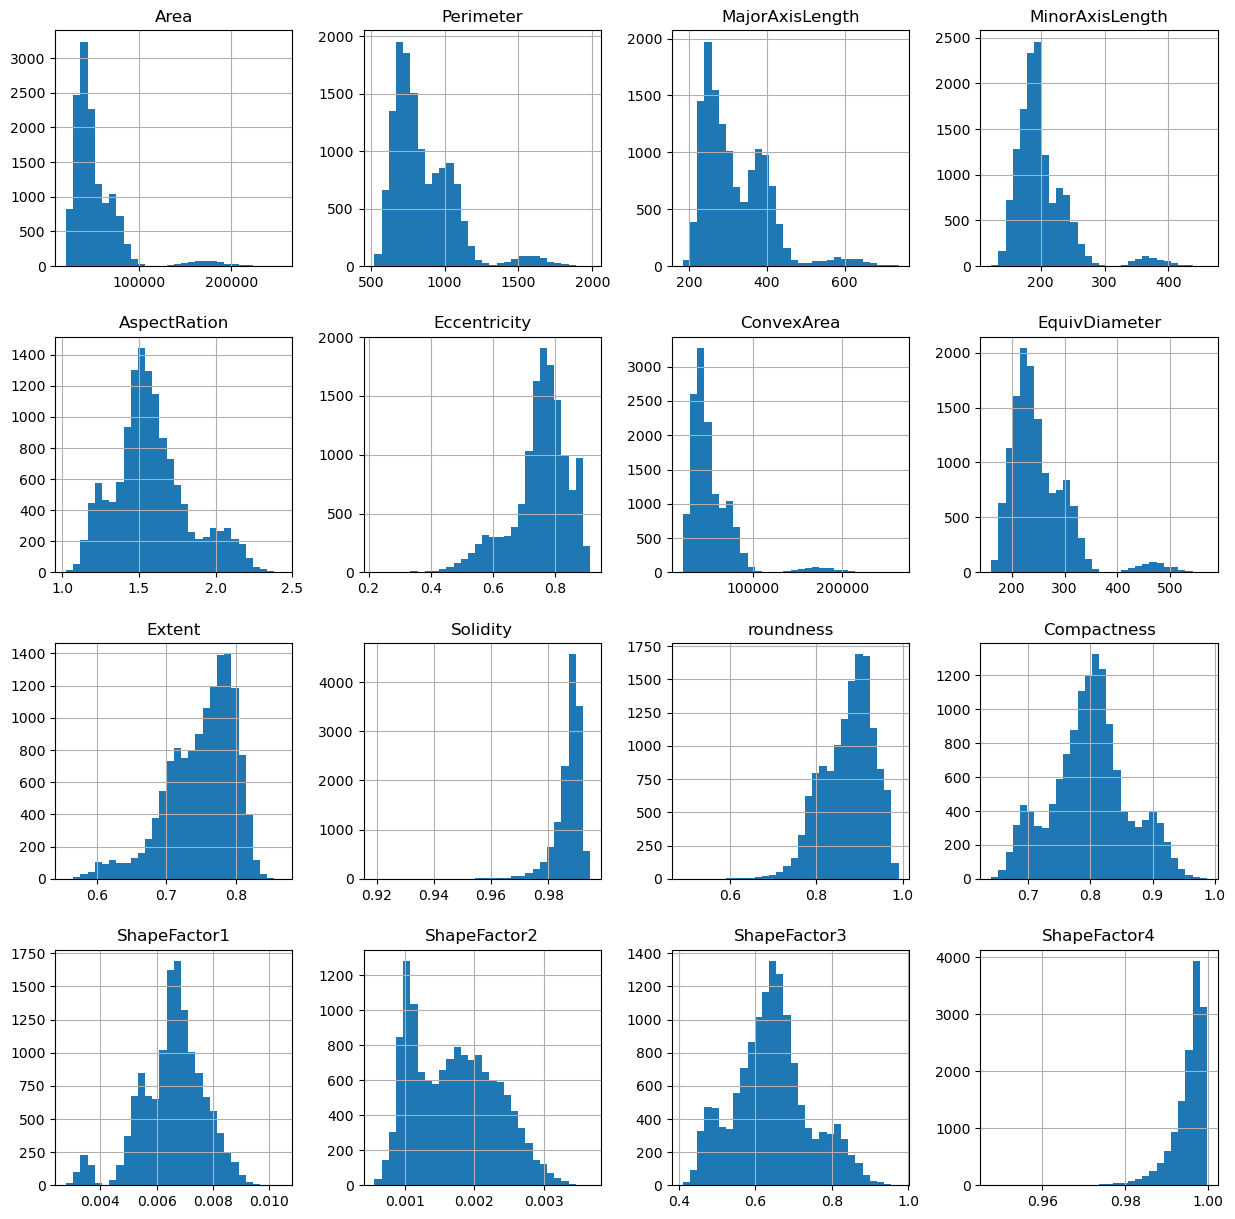

In [8]:
data.hist(bins=30, figsize=(15,15))
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

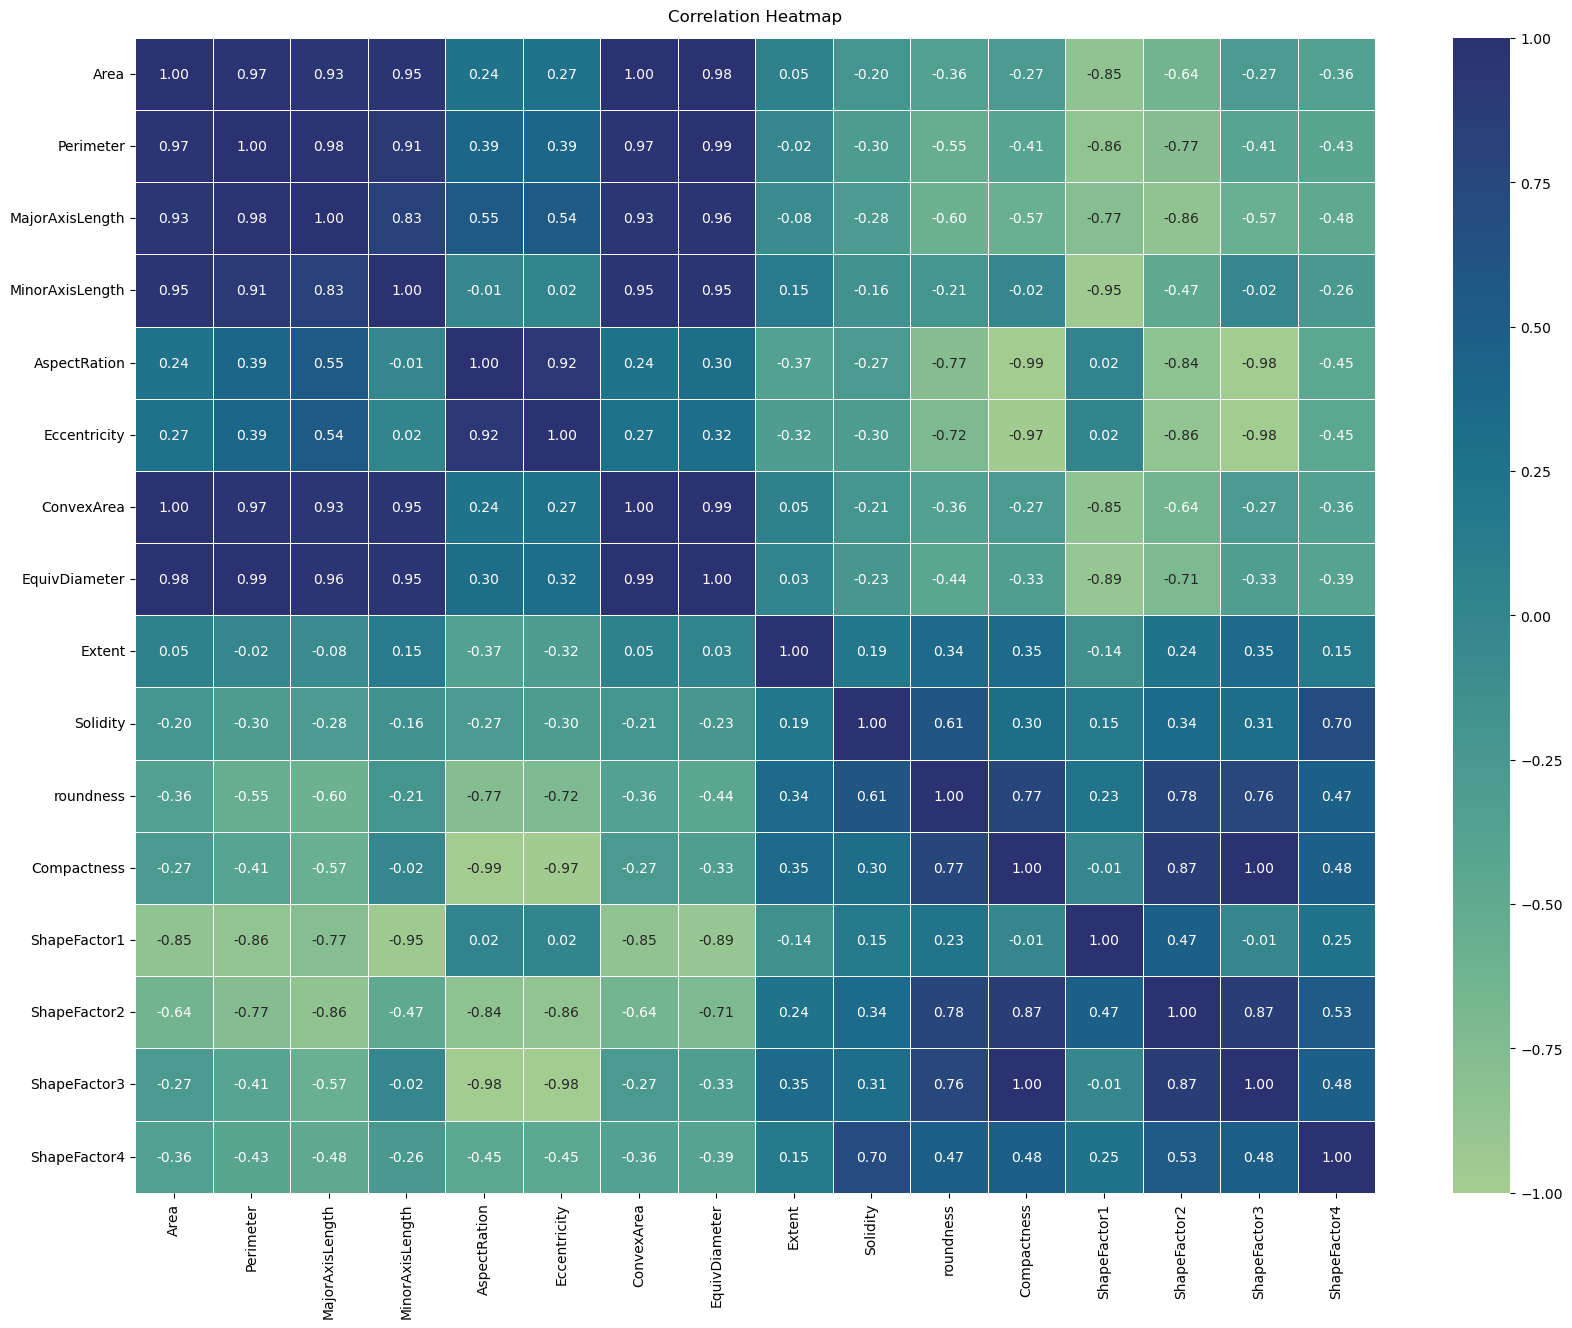

In [9]:
plt.figure(figsize=(20,15))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, fmt=".2f", linewidth=.5, cmap="crest")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

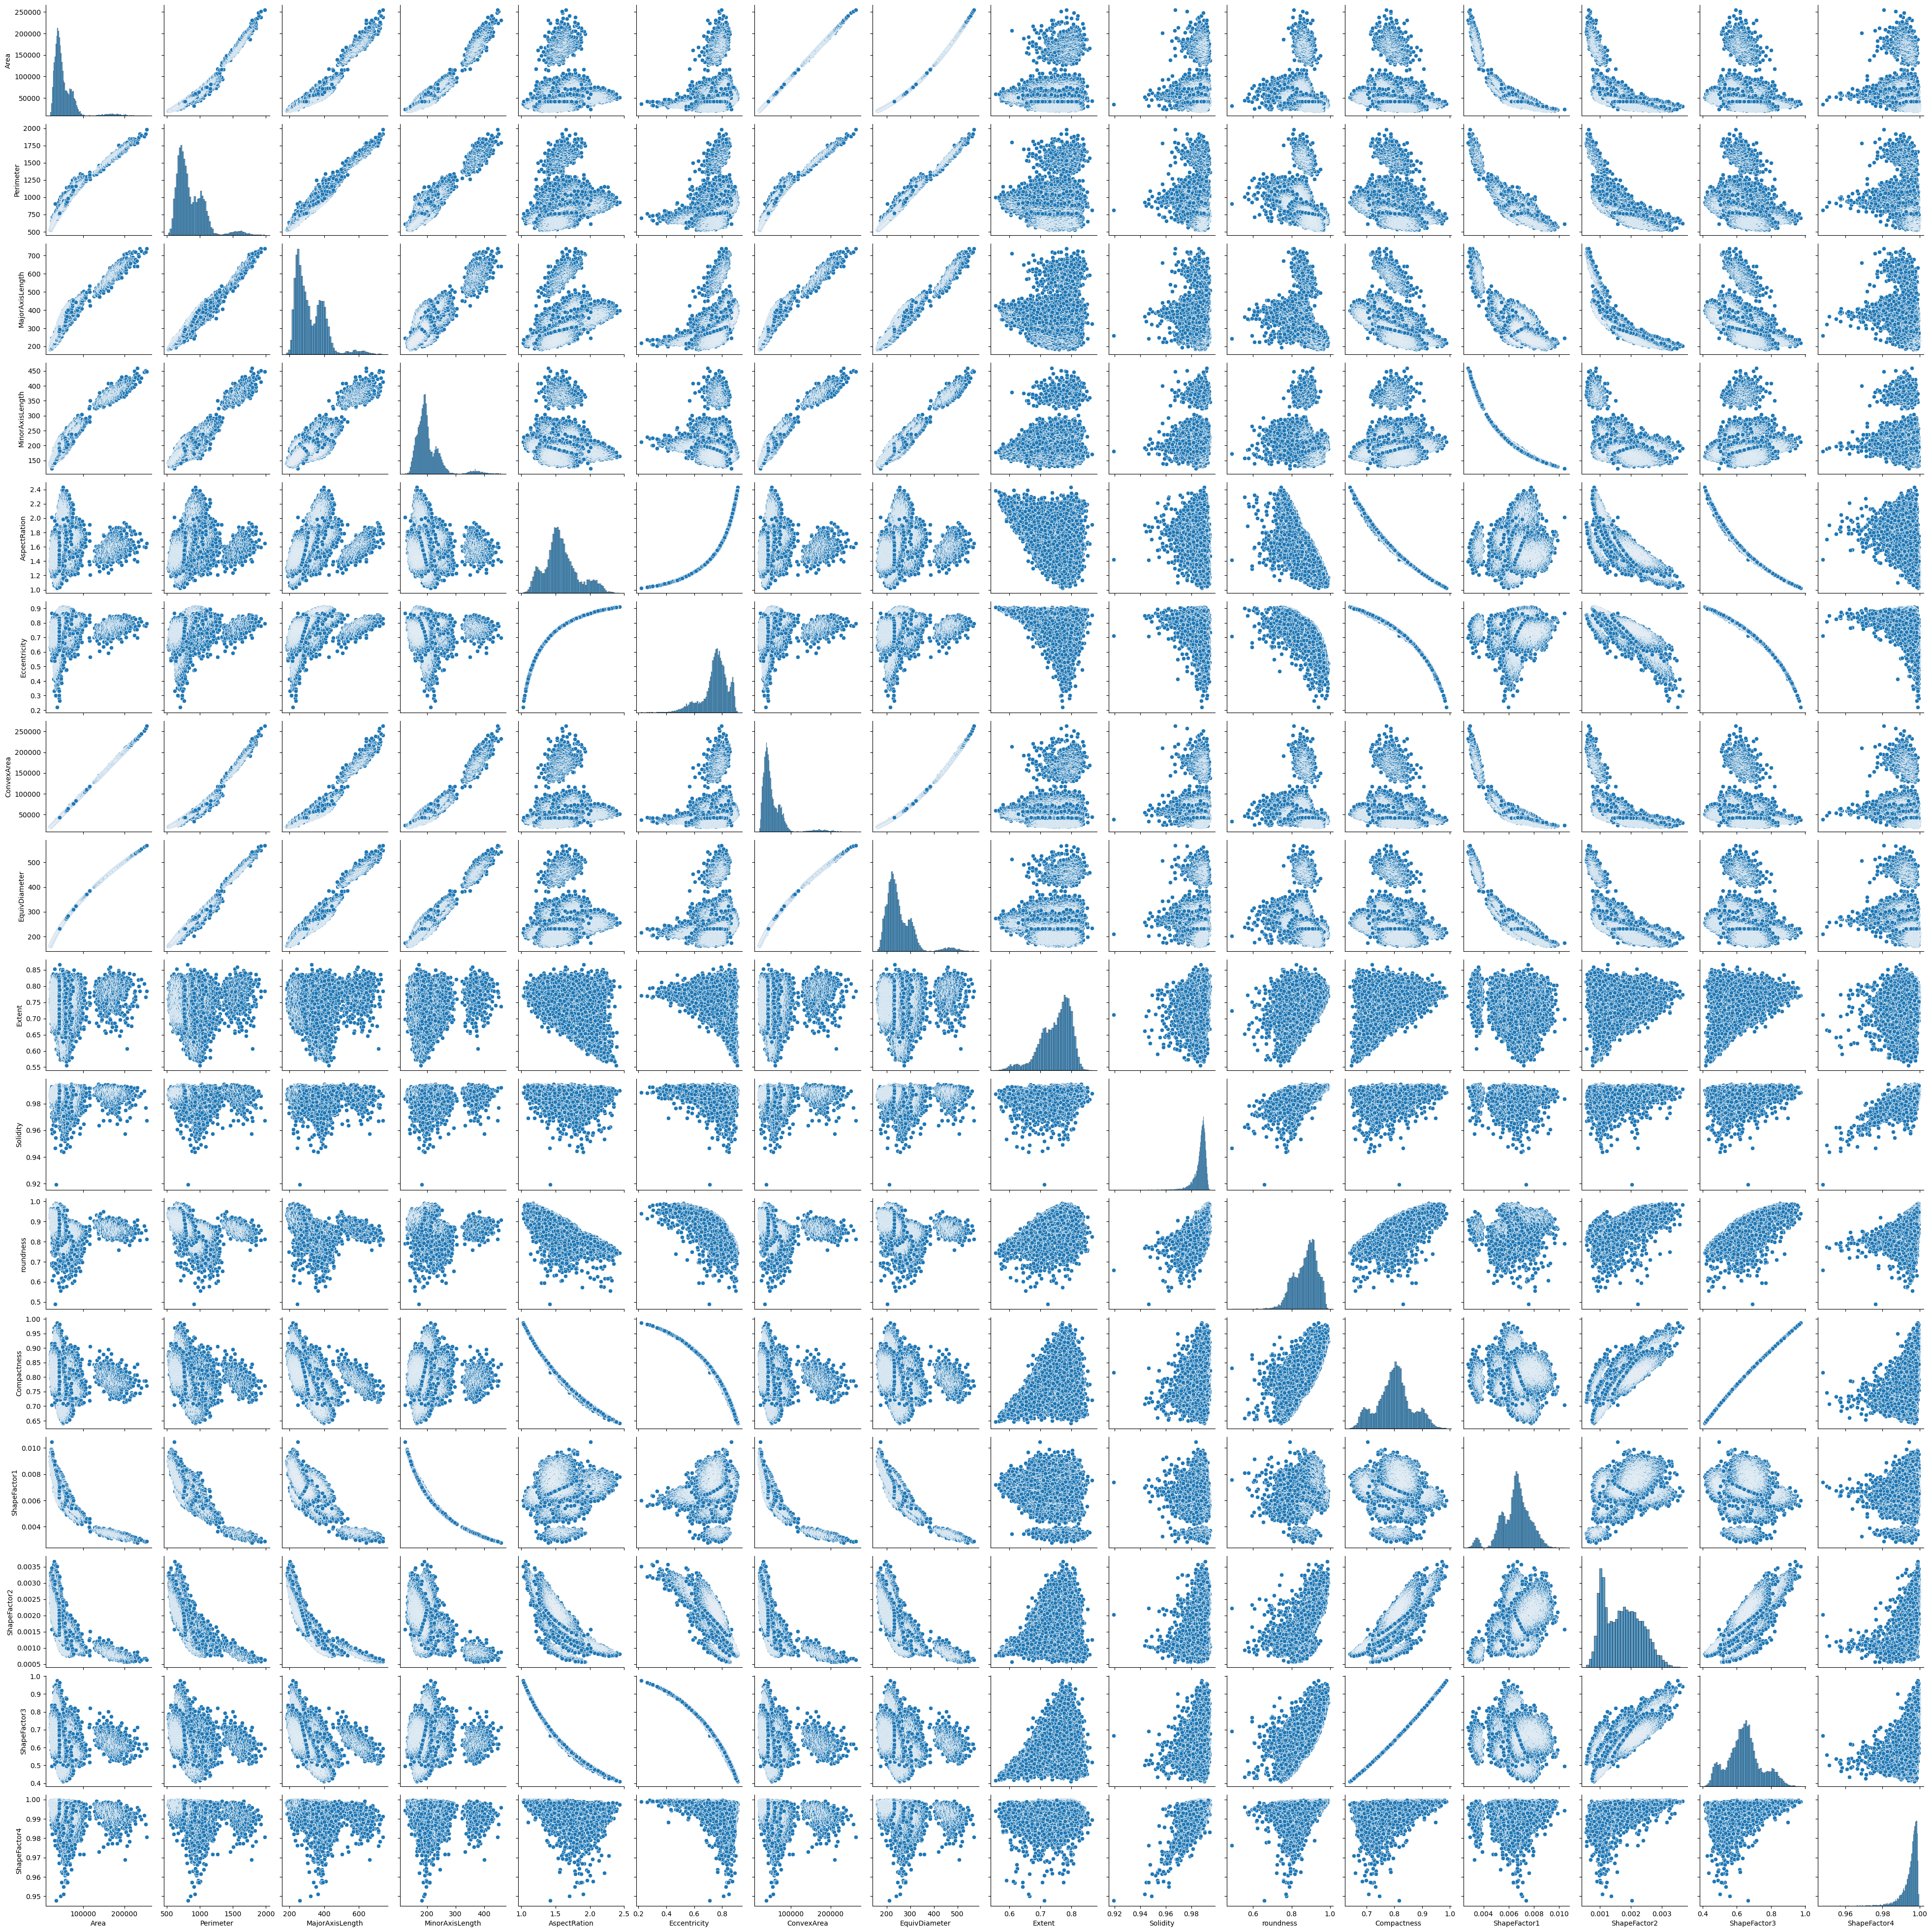

In [39]:
sns.pairplot(data)

In [10]:
data['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

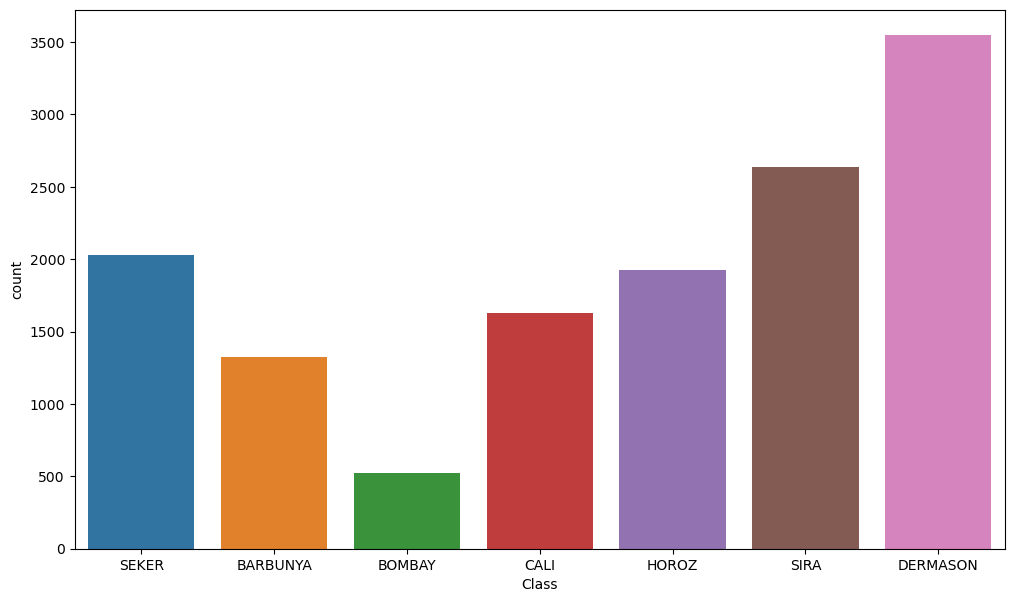

In [11]:
plt.figure(figsize=(12,7))
sns.countplot(x='Class', data=data)
plt.show()

### Independent variable

In [5]:
X = data.drop(columns='Class')
X.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.003147      0.834222      0.998724  
1     0.953861      0.006979      0.003564      0.909851      0.998430  
2     0.908774      0.007244      0.003048      0.825871      0.999066  
3     0.928329      0.007017      0.003215      0.861794      0.994199  
4     0.970516      0.006697      0.003665      0.941900      0.999166

### Dependent Variable

In [6]:
y=pd.factorize(data['Class'])[0]

y

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

## Imbalanced Data

In [7]:
data['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [8]:
!pip install imbalanced-learn

In [9]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [10]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res=smk.fit_resample(X,y)

In [11]:
X_res.shape,y_res.shape

((23824, 16), (23824,))

In [12]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({6: 3546, 5: 2636, 0: 2027, 4: 1928, 3: 1630, 1: 1322, 2: 522})
Resampled dataset shape Counter({2: 3544, 4: 3461, 0: 3437, 3: 3413, 1: 3392, 6: 3309, 5: 3268})


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, train_size=0.7 , random_state=12)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((16676, 16), (16676,), (7148, 16), (7148,))

## Scaler

In [14]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
scaler

StandardScaler()

In [15]:
X_train= scaler.fit_transform(X_train)
X_train

array([[ 2.34825561,  2.2792271 ,  2.37168717, ..., -1.36120105,
        -0.76020138, -2.6082907 ],
       [-0.26516651, -0.04682237,  0.36052264, ..., -1.07761614,
        -1.92020645,  0.60724249],
       [-0.35572801, -0.16923186,  0.16443977, ..., -0.93008878,
        -1.72737684,  0.40299507],
       ...,
       [-0.04277257,  0.03900492,  0.16612586, ..., -0.52016993,
        -0.44894049, -0.14040066],
       [-0.45036327, -0.27545422, -0.10166264, ..., -0.65791921,
        -1.32788946,  0.44776866],
       [-0.64142542, -0.81148397, -1.0306368 , ...,  1.95064901,
         2.26932648,  0.92191541]])

In [16]:
X_test= scaler.fit_transform(X_test)
X_test

array([[-0.12059595,  0.09532536, -0.208411  , ...,  0.18106381,
         0.77604809,  0.46593924],
       [ 0.2235757 ,  0.39445191,  0.52121068, ..., -0.77703258,
        -0.67528032, -1.29197709],
       [ 0.11704329,  0.37219355,  0.51938391, ..., -0.87824809,
        -1.02223537, -3.21914673],
       ...,
       [-0.81992621, -1.06572533, -1.08391384, ...,  1.32569242,
         0.83715052,  1.02835633],
       [ 0.06035313,  0.37441861,  0.03600195, ..., -0.1231996 ,
         0.49390205,  0.71390717],
       [-0.53222801, -0.67971509, -0.84868806, ...,  1.4122587 ,
         1.84825496,  0.97371832]])

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [43]:
model.fit(X_train, y_train)

LogisticRegression()

In [45]:
model.score(X_test, y_test)*100

94.9076664801343

In [27]:
y_predicted = model.predict(X_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[1007,   11,    0,    1,    0,   21,   13],
       [   2,  930,    0,   40,    2,   11,    0],
       [   0,    0, 1043,    0,    0,    0,    0],
       [   3,   23,    0,  973,   13,    6,    0],
       [   0,    1,    0,   16, 1007,   13,    8],
       [  17,    6,    0,    5,   17,  914,   45],
       [  12,    1,    0,    0,    3,   74,  910]], dtype=int64)

## KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7).fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=7)

In [47]:
pred=knn.predict(X_test)
pred

array([1, 3, 3, ..., 6, 1, 0], dtype=int64)

In [49]:
from sklearn import metrics as sm
sm.accuracy_score(y_test,pred)*100

95.36933407946279

## Naive Bayes 

In [32]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test)

In [34]:
y_pred

array([1, 3, 3, ..., 6, 1, 0], dtype=int64)

In [35]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 92.90710688304421


## Random Forest 

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming you have your dataset in the form of feature matrix X and labels y
# X should be a 2D array with shape (num_samples, num_features)
# y should be a 1D array with shape (num_samples,)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest classifier
# You can adjust the hyperparameters according to your specific needs
# For simplicity, I'm using 100 trees here.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 95.20145495243425


In [29]:
# Confusion Matrix
y_pred = rf_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[1012,    7,    0,    1,    0,   18,   15],
       [   1,  936,    0,   36,    5,    7,    0],
       [   0,    0, 1043,    0,    0,    0,    0],
       [   2,   21,    1,  976,   14,    4,    0],
       [   0,    5,    0,   13, 1007,   15,    5],
       [  14,   13,    0,    4,   12,  914,   47],
       [  15,    0,    0,    0,    5,   63,  917]], dtype=int64)

In [33]:
!pip install lazypredict

     ---------------------------------------- 1.3/1.3 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 70.9/70.9 MB 8.3 MB/s eta 0:00:00


In [17]:
### importing lazypredict library
import lazypredict
### importing LazyClassifier for classification problem
from lazypredict.Supervised import LazyClassifier
### importing LazyClassifier for classification problem because here we are solving Classification use case.
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)

In [20]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
### lets check which model did better on Breast Cancer Dataset
print(models)

 38%|███▊      | 11/29 [04:38<07:35, 25.29s/it]


KeyboardInterrupt: 

## Stratified K-fold Cross Validation

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
skfold=StratifiedKFold(n_splits=5)
model=DecisionTreeClassifier()
scores=cross_val_score(model,X,y,cv=skfold)*100
print(np.mean(scores))

56.39608764482922


## XG Boost

In [54]:
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your dataset in the form of feature matrix X and labels y
# X should be a 2D array with shape (num_samples, num_features)
# y should be a 1D array with shape (num_samples,)

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBoost classifier
# You can adjust the hyperparameters according to your specific needs
xgb_classifier = xgb.XGBClassifier(
    n_estimators=150,         # Number of boosting rounds (trees)
    learning_rate=0.1,        # Step size shrinkage used in update to prevent overfitting
    max_depth=25,              # Maximum depth of a tree
    min_child_weight=1,       # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.8,            # Subsample ratio of the training instances
    colsample_bytree=0.8,     # Subsample ratio of columns when constructing each tree
    gamma=0,                  # Minimum loss reduction required to make a further partition on a leaf node
    random_state=42           # Random seed for reproducibility
)

# Train the classifier on the training data
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy:", accuracy)


Accuracy: 95.59317291550083


## RESULT

### Accuracy By Different Model

1. Logistic Regression :- 94.9076664801343
2. KNN                 :- 95.36933407946279
3. Naive Bayess        :- 92.90710688304421
4. Random Forest       :- 95.20145495243425
5. XG Boost            :- 95.59317291550083

## Conclusion

I will go with XG Boost Model beacuse the accurarcy rate is higher than rest models i.e 95.6%